In [4]:
import requests
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
API_URL = "https://www.rottentomatoes.com/napi/season/{season_id}/reviews/user?{after_or_before}={cursor}&pageCount=1000"

# SQUID GAME SEASON 1
# MOVIE_ID = ""
# CURSOR = ""

# SQUID GAME SEASON 2
MOVIE_ID = ""
CURSOR = ""

target_url = API_URL.format(season_id=MOVIE_ID, after_or_before="after", cursor=CURSOR)

response = requests.get(target_url)
print(len(response.json()['reviews']))
reviews = response.json()['reviews']

429


In [6]:
target_url = API_URL.format(season_id=MOVIE_ID, after_or_before="before", cursor=CURSOR)

response = requests.get(target_url)
print(len(response.json()['reviews']))
reviews.extend(response.json()['reviews'])

541


In [7]:
print(len(reviews))

970


In [8]:
df = pd.DataFrame(reviews)
df.head()

,rating,quote,reviewId,isVerified,isSuperReviewer,hasSpoilers,hasProfanity,score,creationDate,userAccountLink,userDisplayName,userRealm,userId
0,5.0,What breaks my heart is how short season 2 is....,69c680ec-1563-44c8-9fb3-0aa2b45b7ee2,False,False,False,False,5.0,"Dec 29, 2024",/profiles/DGehb2uVwh2PfB9I9kiB0Fj2uLLCwxiMLsRj...,Christine M,RT,6bd3ade8-41c5-4d8f-b7ff-2d243907ee89
1,1.0,Não entendi como estão achando bom uma tempora...,9f20c6a4-60e8-4ec0-9cd8-aaf1ac43935b,False,False,False,False,1.0,"Dec 29, 2024",/profiles/jndCdNtpduARhjwHePtpQtjrC00CdBSn1Cqo...,Carlos R,RT,ed860dde-2eed-4258-a89e-e8544a08590f
2,5.0,Just as good as the first season. More depth a...,cae3fb2d-706c-4b59-9326-32808891e632,False,False,False,False,5.0,"Dec 29, 2024",/profiles/2dqHWLi0RsJ0H94HMWCg2f18hxxCbRIJouL4...,John C,RT,04ca0c36-7be3-4f72-8224-362be8886f5a
3,3.5,After the end of the season I was just in shoc...,75b65727-5dba-476c-8a98-44f717f4d756,False,False,False,False,3.5,"Dec 29, 2024",/profiles/oOgUXehJos9YhN4ha8tRluZQF66CJrS6PSvA...,Gosho B,RT,be166df9-2d0d-43e3-9a08-3d878a509745
4,4.5,I absolutely loved both seasons 1 and 2 of Squ...,812c47bd-a7ab-4f0b-b3b6-01623a3940dc,False,False,False,False,4.5,"Dec 29, 2024",/profiles/L20UxWhgVCPOuYVIpocNriamCvvCZaimxIna...,Manisha H,RT,a6e87f4e-4ae2-47bf-89fb-141736056703


In [9]:
word_df = df[['rating', 'quote']].copy()
word_df['word'] = word_df['quote'].str.split()
word_df = word_df.explode('word', ignore_index=True)
word_df = word_df.drop(columns=['quote'])

In [10]:
word_df['word'] = word_df['word'].str.lower()
word_df['word'] = word_df['word'].str.replace(r'[^a-zA-Z]+', '', regex=True)
word_df = word_df[word_df['word'] != '']

In [11]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
word_df = word_df[~word_df['word'].isin(stop_words)]

In [12]:
# length of word_df
print(len(word_df))
# word로 groupby 하고 rating 별로 몇번 나왔는지 카운트
word_df = word_df.groupby(['word', 'rating']).size().reset_index(name='count')
print(len(word_df))

30056
12670


In [13]:
word_df = word_df.sort_values(by='count', ascending=False)
# word_df.to_csv('word_df_sorted.csv', index=False)

In [14]:
word_df_positive = word_df[word_df['rating'] > 3]
print('positive: ', len(word_df_positive))
word_df_positive = word_df_positive.groupby('word').sum().reset_index()
word_df_positive = word_df_positive.sort_values(by='count', ascending=False)
# word_df_positive.to_csv('word_df_positive.csv', index=False)

word_df_negative = word_df[word_df['rating'] <= 3]
print('negative: ', len(word_df_negative))
word_df_negative = word_df_negative.groupby('word').sum().reset_index()
word_df_negative = word_df_negative.sort_values(by='count', ascending=False)
# word_df_negative.to_csv('word_df_negative.csv', index=False)


positive:  6344
negative:  6326


In [15]:
threshold_positive = word_df_positive['count'].quantile(0.95)
threshold_negative = word_df_negative['count'].quantile(0.95)

common_df = pd.merge(
    word_df_positive[['word', 'count']],
    word_df_negative[['word', 'count']],
    on='word',
    how='inner',
    suffixes=('_positive', '_negative')
)

common_frequent_words = common_df[
    (common_df['count_positive'] >= threshold_positive) &
    (common_df['count_negative'] >= threshold_negative)
]['word']

print(common_frequent_words)

0        season
1         first
2          good
3         games
4          game
         ...   
184    expected
187       years
190       thing
195     written
207    suspense
Name: word, Length: 123, dtype: object


In [16]:
word_df_positive_filtered = word_df_positive[~word_df_positive['word'].isin(common_frequent_words)]
word_df_negative_filtered = word_df_negative[~word_df_negative['word'].isin(common_frequent_words)]

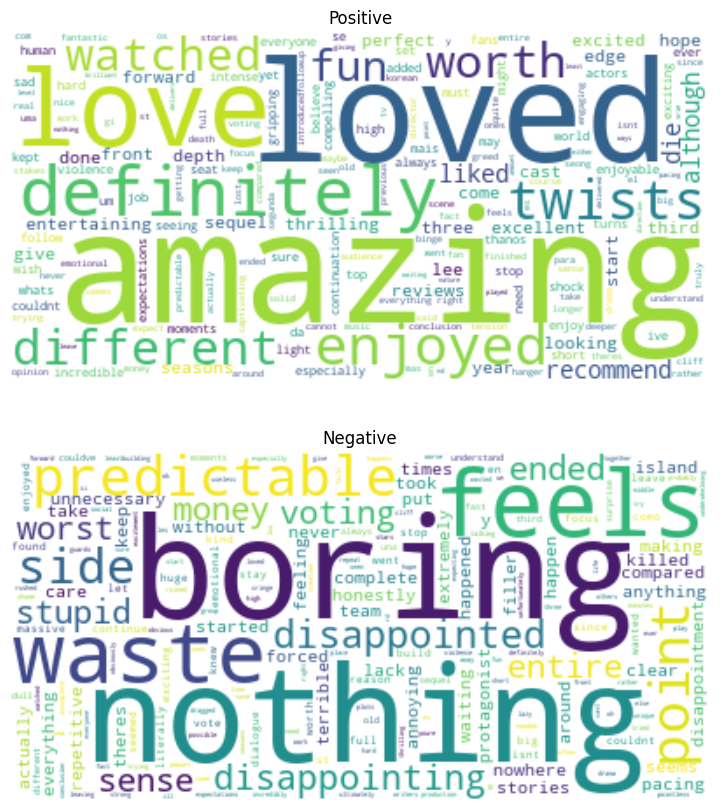

In [17]:
word_df_positive_filtered_dict = word_df_positive_filtered.set_index('word')['count'].to_dict()
word_df_negative_filtered_dict = word_df_negative_filtered.set_index('word')['count'].to_dict()

wordcloud_positive = WordCloud(background_color='white', max_words=200).generate_from_frequencies(word_df_positive_filtered_dict)
wordcloud_negative = WordCloud(background_color='white', max_words=200).generate_from_frequencies(word_df_negative_filtered_dict)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive')

plt.subplot(2, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative')
plt.show()